# Se Importan librerias y dataframe 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el almacenamiento
df_medallion = pd.read_csv('Medallion_clean.csv')

# Mostrar las primeras filas de cada DataFrame
print(df_medallion.head())


  License Number Vehicle VIN Number Vehicle Type  Model Year Last Date Updated
0           1A10  NM0GS9E29P1553903          WAV      2023.0        2024-11-07
1           1A11  JTMRWRFV5ND149811          HYB      2022.0        2024-11-07
2           1A12  4T1BD1FK5EU127379          NaN      2016.0        2020-06-30
3           1A13  4T3LWRFV1MU047137          HYB      2021.0        2024-11-07
4           1A14  5TDZZ3DC3LS050041          WAV      2020.0        2024-11-07


# Se eliminan columnas inecesarias

# Razones para la Eliminación

**Name, Expiration Date, Current Status:**

*Motivo:* Información administrativa que no es esencial para el análisis de eficiencia operativa o emisiones.

**DMV License Plate Number:**

*Motivo:* Número de identificación de la placa del vehículo, no relevante para el análisis de nuestro objetivo.

**Medallion Type, Agent Number, Agent Telephone Number, Agent Name:**

*Motivo:* Información administrativa sobre agentes y tipos de medallones, no crítica para el análisis de operaciones.

**Agent Website Address, Agent Address:**

*Motivo:* Información adicional sobre agentes, no aporta valor significativo al análisis principal de eficiencia y emisiones.

**Last Time Updated:**

*Motivo:* Esta columna se integra con Last Date Updated para formar una única columna *Last Updated*, facilitando así la eliminación de duplicados y manteniendo la información más reciente.


In [5]:
# Columnas a eliminar
columnas_a_eliminar_medallion =  [
    'Name', 'Expiration Date', 'Current Status', 'DMV License Plate Number',
    'Medallion Type', 'Agent Number', 'Agent Telephone Number', 'Agent Name',
    'Agent Website Address','Agent Address', 'Last Time Updated'
]


# Eliminar columnas
df_medallion = df_medallion.drop(columns=columnas_a_eliminar_medallion, errors='ignore')


# Ver Valores nulos en Medallion

In [6]:
# Valores nulos en Medallion
print("Valores nulos en Medallion:")
display(df_medallion.isnull().sum())


Valores nulos en Medallion:


License Number           0
Vehicle VIN Number       0
Vehicle Type          2517
Model Year               1
Last Date Updated        1
dtype: int64

# Buscar duplicados

In [7]:
# Contar valores duplicados de 'License Number'
duplicate_license_count = df_medallion['License Number'].duplicated().sum()

# Mostrar el conteo
print(f"Cantidad de valores duplicados de 'License Number': {duplicate_license_count}")

Cantidad de valores duplicados de 'License Number': 0


In [8]:
# Obtener la cantidad total de registros
total_records = len(df_medallion)

# Mostrar la cantidad total
print(f"Cantidad total de registros en df_medallion: {total_records}")

Cantidad total de registros en df_medallion: 13147


In [9]:
# Contar valores duplicados de 'Vehicle VIN Number'
duplicate_vin_count = df_medallion['Vehicle VIN Number'].duplicated().sum()

# Mostrar el conteo
print(f"Cantidad de valores duplicados de 'Vehicle VIN Number': {duplicate_vin_count}")

Cantidad de valores duplicados de 'Vehicle VIN Number': 0


# Eliminar duplicados y tomar valor de ultima fecha actualizada

In [21]:
# Ordenar por 'Vehicle VIN Number' y 'Last Date Updated'
df_medallion_sorted = df_medallion.sort_values(by=['Vehicle VIN Number', 'Last Date Updated'], ascending=[True, False])

# Eliminar duplicados de 'Vehicle VIN Number', manteniendo el más reciente
df_medallion = df_medallion_sorted.drop_duplicates(subset='Vehicle VIN Number', keep='first')

# Ordenar el DataFrame limpio por 'License Number' y 'Last Date Updated'
df_medallion = df_medallion_clean.sort_values(by=['License Number', 'Last Date Updated'], ascending=[True, False])

# Eliminar duplicados de 'License Number' en el DataFrame limpio, manteniendo el más reciente
df_medallion = df_medallion_clean.drop_duplicates(subset='License Number', keep='first')

print(df_medallion.head())


  License Number Vehicle VIN Number Vehicle Type  Model Year Last Date Updated
0           1A10  NM0GS9E29P1553903          WAV        2023        2024-11-07
1           1A11  JTMRWRFV5ND149811          HYB        2022        2024-11-07
2           1A12  4T1BD1FK5EU127379           SD        2016        2020-06-30
3           1A13  4T3LWRFV1MU047137          HYB        2021        2024-11-07
4           1A14  5TDZZ3DC3LS050041          WAV        2020        2024-11-07


# Reemplazar valores NaN en la columna 'Vehicle Type' con 'SD'


In [22]:
# Reemplazar valores NaN en la columna 'Vehicle Type' con 'SD'
df_medallion['Vehicle Type'] = df_medallion['Vehicle Type'].fillna('SD')



# Corregir la columna Model_Year de df

In [23]:

# Eliminar filas con valores NaN en la columna 'Model Year'
df_medallion = df_medallion.dropna(subset=['Model Year'])

# Convertir la columna 'Model Year' a enteros sin decimales
df_medallion['Model Year'] = df_medallion['Model Year'].astype(int)

# Verificar los cambios
print(df_medallion['Model Year'].dtype)
print(df_medallion.head())

int32
  License Number Vehicle VIN Number Vehicle Type  Model Year Last Date Updated
0           1A10  NM0GS9E29P1553903          WAV        2023        2024-11-07
1           1A11  JTMRWRFV5ND149811          HYB        2022        2024-11-07
2           1A12  4T1BD1FK5EU127379           SD        2016        2020-06-30
3           1A13  4T3LWRFV1MU047137          HYB        2021        2024-11-07
4           1A14  5TDZZ3DC3LS050041          WAV        2020        2024-11-07


# Se Exporta a CVS limpio 

In [24]:
# Assuming you have df_medallion_clean DataFrame

df_medallion.to_csv('medallion_clean111.csv', index=False)

# Analisis de los datos ya limpios

Descripción del DataFrame:
       License Number Vehicle VIN Number Vehicle Type    Model Year  \
count           13146              13146        13146  13146.000000   
unique          13146              13146            6           NaN   
top              1A10  NM0GS9E29P1553903          HYB           NaN   
freq                1                  1         5855           NaN   
mean              NaN                NaN          NaN   2018.621786   
std               NaN                NaN          NaN     18.004077   
min               NaN                NaN          NaN      0.000000   
25%               NaN                NaN          NaN   2015.000000   
50%               NaN                NaN          NaN   2019.000000   
75%               NaN                NaN          NaN   2022.000000   
max               NaN                NaN          NaN   2025.000000   

       Last Date Updated  
count              13146  
unique              1215  
top           2024-11-07  
freq        

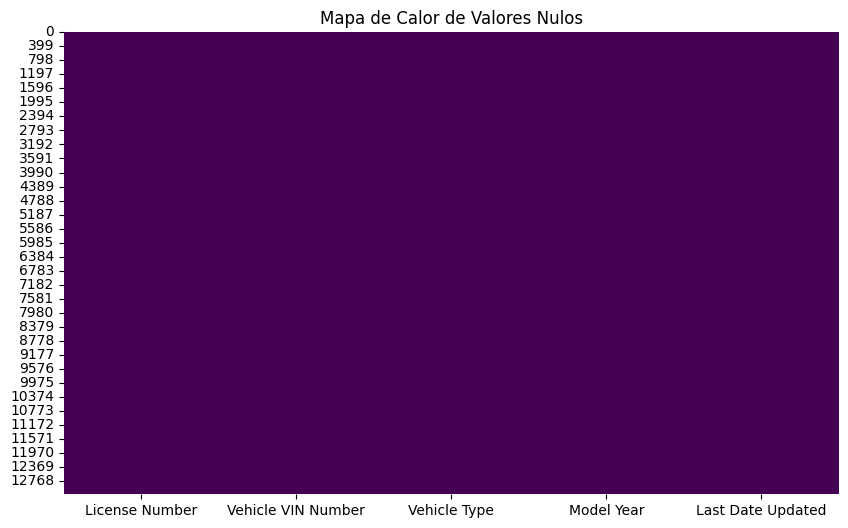


Cantidad de filas duplicadas:
0

Tipos de datos por columna:
License Number        object
Vehicle VIN Number    object
Vehicle Type          object
Model Year             int64
Last Date Updated     object
dtype: object
Cantidad de líneas en df_medallion_clean: 13146


In [ ]:
# Cargar el archivo CSV
file_path = r'medallion_clean111.csv'
df_medallion_clean = pd.read_csv(file_path)

# Describir el DataFrame
print("Descripción del DataFrame:")
print(df_medallion_clean.describe(include='all'))

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df_medallion_clean.isnull().sum())

# Buscar duplicados
print("\nCantidad de filas duplicadas:")
print(df_medallion_clean.duplicated().sum())

# Analizar tipos de datos
print("\nTipos de datos por columna:")
print(df_medallion_clean.dtypes)

print(f"Cantidad de líneas en df_medallion_clean: {len(df_medallion_clean)}")